<a href="https://colab.research.google.com/github/loydvinup/DecisionTree-HeartCSV-/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [5]:
#load the data
df = pd.read_csv("/content/heart (5).csv")

In [6]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


EDA

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
df.shape

(303, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [12]:
df.describe()
#df.describe(numeric_only=True)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
df.duplicated().sum()

1

In [14]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

0

In [17]:
#outlier detection

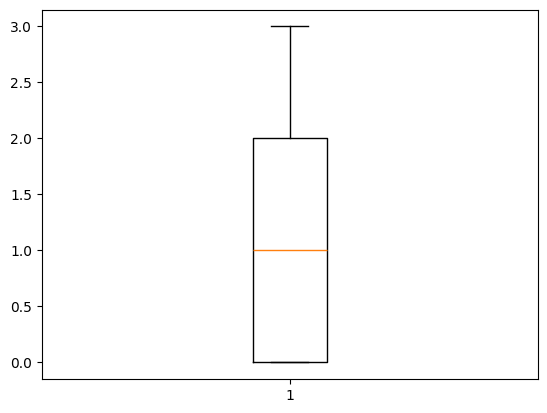

In [18]:
plt.boxplot(df['cp'])
plt.show()

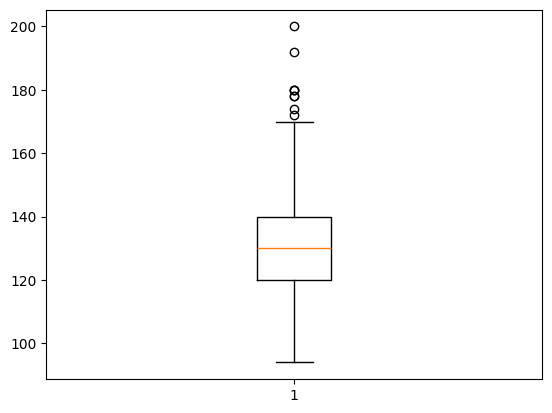

In [19]:
plt.boxplot(df['trestbps'])
plt.show()

In [20]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

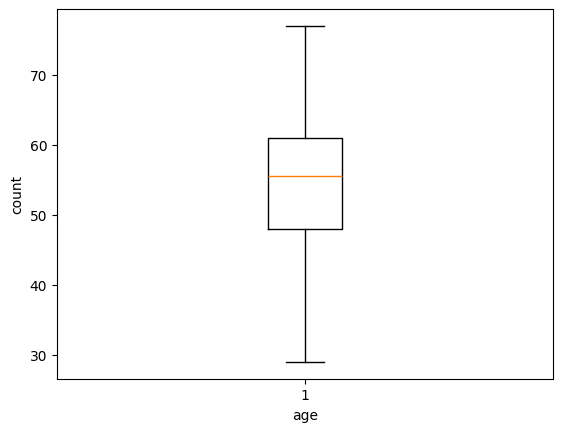

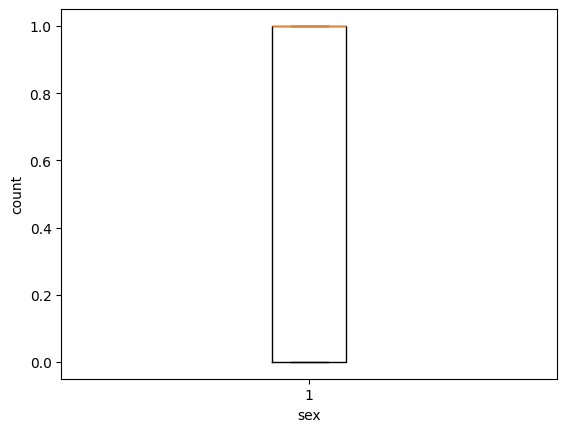

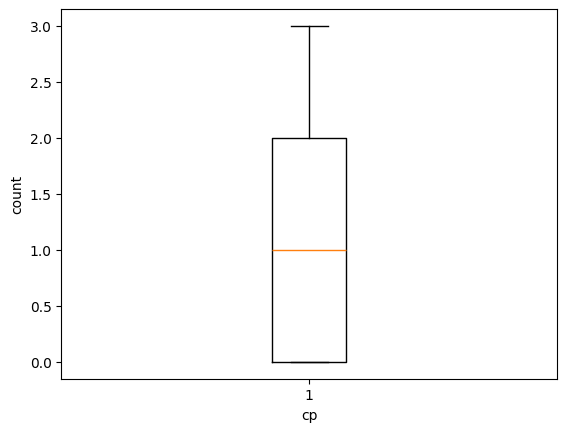

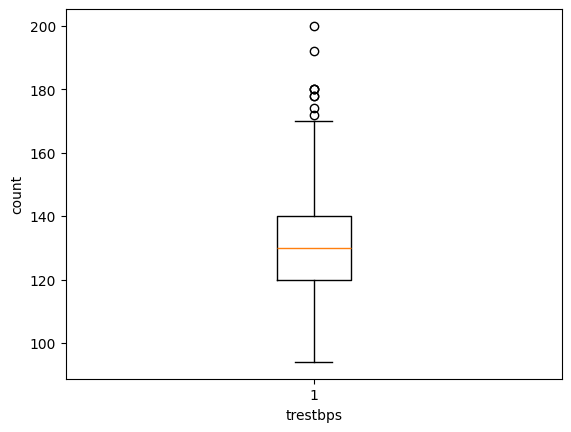

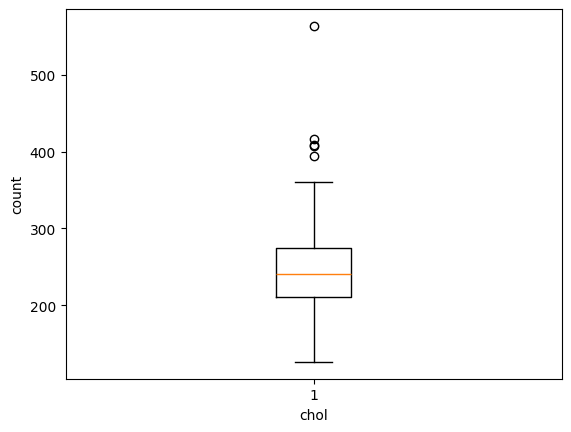

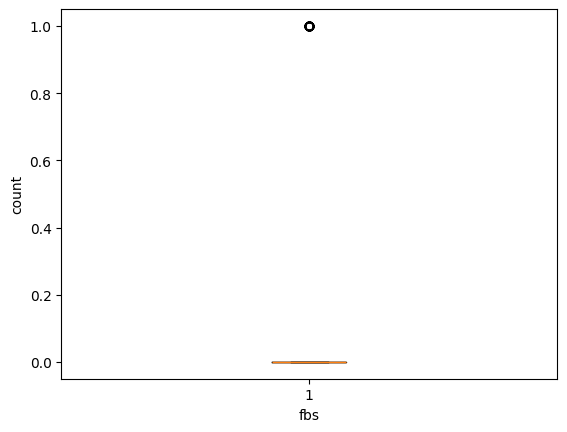

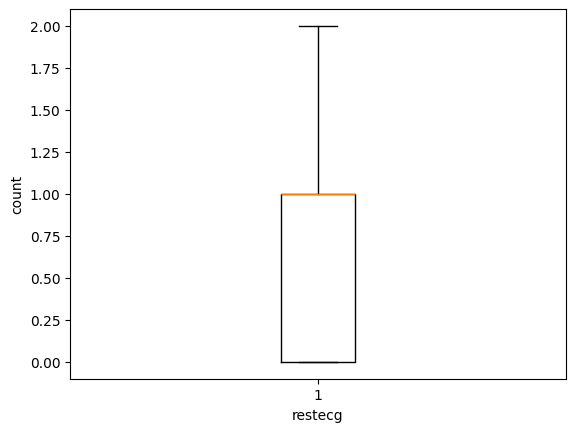

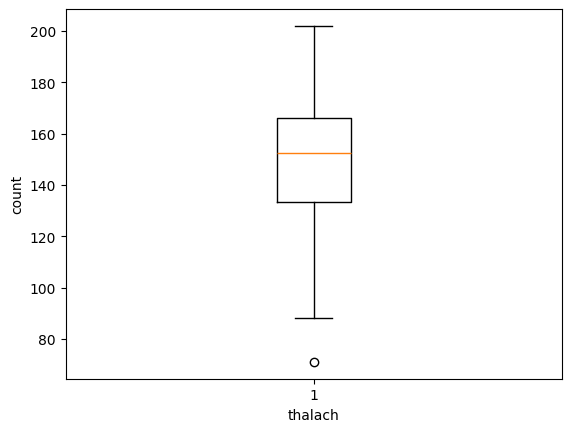

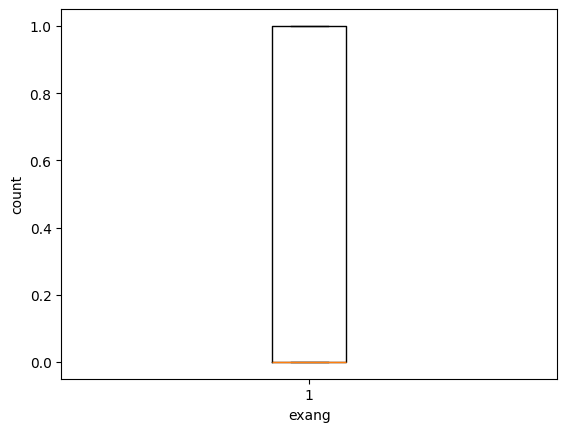

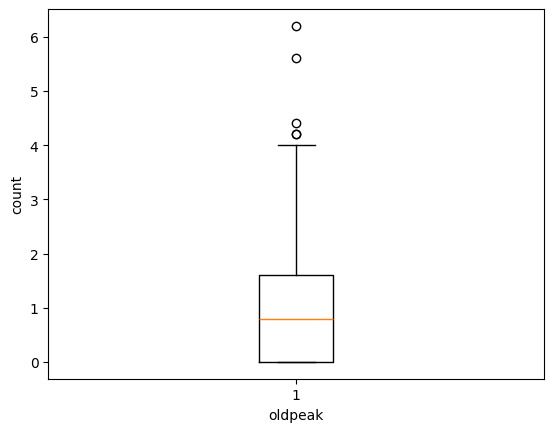

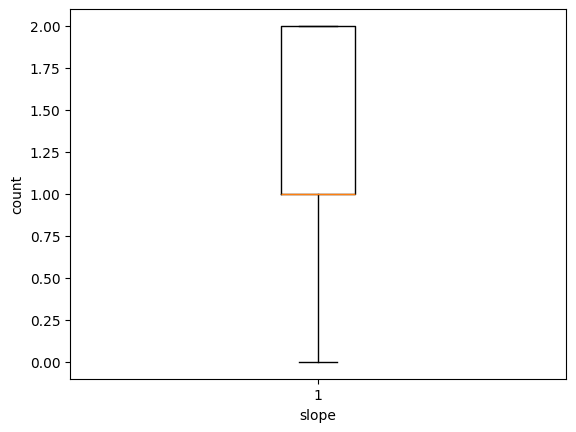

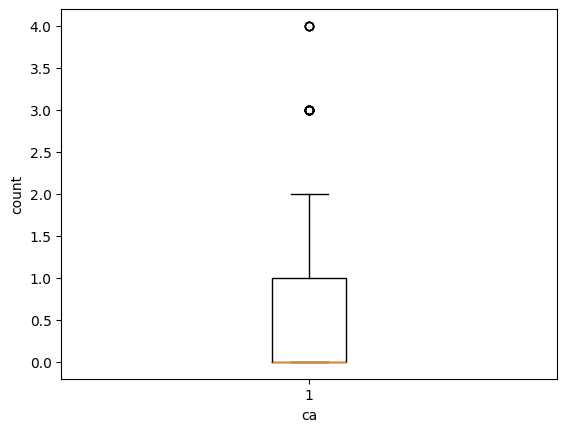

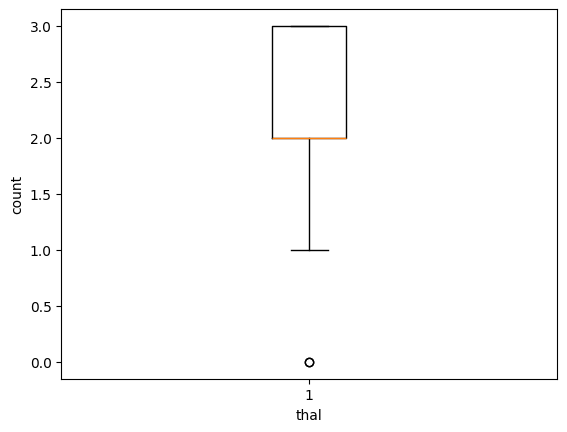

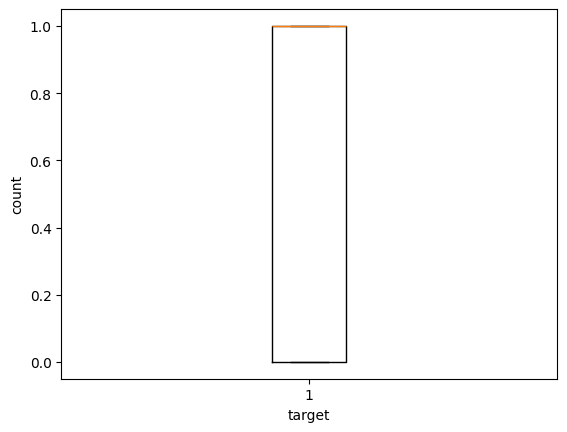

In [21]:
for i in df.columns:
    if ((df[i].dtype !='object')):
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.ylabel("count")
        plt.show()


In [22]:
#trestbps,chol,thalach,oldpeak,ca,thal

In [23]:
df['fbs'].value_counts()

,count
fbs,
0,257
1,45


In [24]:
df['trestbps'].value_counts()

,count
trestbps,
120,37
130,36
140,32
110,19
150,17
128,12
138,12
160,11
125,11


In [25]:
#Model building

In [26]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
#splitting the data into dependent and independent

In [28]:
y=df['target']  #depedent

In [29]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [30]:
x=df.iloc[:,:-1]  #independent
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [31]:
#splitting the data into training and testing

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=12)

In [34]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
137,62,1,1,128,208,1,0,140,0,0.0,2,0,2
232,55,1,0,160,289,0,0,145,1,0.8,1,1,3
68,44,1,1,120,220,0,1,170,0,0.0,2,0,2
142,42,0,2,120,209,0,1,173,0,0.0,1,0,2
149,42,1,2,130,180,0,1,150,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2
242,64,1,0,145,212,0,0,132,0,2.0,1,2,1
254,59,1,3,160,273,0,0,125,0,0.0,2,0,2


In [35]:
y_train

,target
137,1
232,0
68,1
142,1
149,1
...,...
260,0
130,1
242,0
254,0


In [36]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2
67,45,0,1,130,234,0,0,175,0,0.6,1,0,2
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3
217,63,1,0,130,330,1,0,132,1,1.8,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2
243,57,1,0,152,274,0,1,88,1,1.2,1,1,3
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3
50,51,0,2,130,256,0,0,149,0,0.5,2,0,2


In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
#build the model

In [39]:
dt = DecisionTreeClassifier(max_depth=2)

In [40]:
#train the model--->fit()
dt=dt.fit(x_train,y_train)

In [41]:
#predict/testing the model----->predict()
y_pred = dt.predict(x_test)

In [42]:
y_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1])

In [43]:
#model performance

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [45]:
accuracy_score(y_pred,y_test)

0.7802197802197802

In [46]:
confusion_matrix(y_pred,y_test)

array([[37, 12],
       [ 8, 34]])

In [47]:
#(Tp+Tn)/(tp+tn+fp+fn)

In [48]:
(37+34)/(37+12+8+34)

0.7802197802197802

In [49]:
param_name = 'max_depth'
param_values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]


In [50]:
for input_param in param_values:
    model = DecisionTreeClassifier(max_depth=input_param)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test,y_pred)*100
    print("max depth=",input_param,"accuracy=",acc_score)

max depth= 1 accuracy= 73.62637362637363
max depth= 2 accuracy= 78.02197802197803
max depth= 3 accuracy= 76.92307692307693
max depth= 4 accuracy= 78.02197802197803
max depth= 5 accuracy= 76.92307692307693
max depth= 6 accuracy= 75.82417582417582
max depth= 7 accuracy= 74.72527472527473
max depth= 8 accuracy= 75.82417582417582
max depth= 9 accuracy= 70.32967032967034
max depth= 10 accuracy= 78.02197802197803
max depth= 11 accuracy= 70.32967032967034
max depth= 12 accuracy= 72.52747252747253
max depth= 13 accuracy= 73.62637362637363
max depth= 14 accuracy= 73.62637362637363
max depth= 15 accuracy= 73.62637362637363


<Axes: xlabel='age', ylabel='count'>

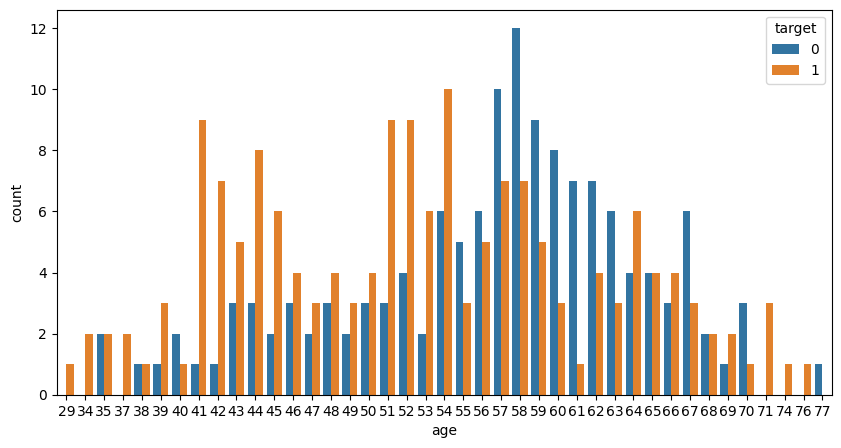

In [51]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['age'],hue='target',data=df)